In [1]:
import os

In [2]:
base_dir = r'Insert the path for Base Folder here'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.10000.jpg', 'dog.10001.jpg', 'dog.10002.jpg', 'dog.10003.jpg', 'dog.10004.jpg']


In [4]:
print('Total Training Cat Images :', len(os.listdir(train_cats_dir)))
print('Total Training Dog Images :', len(os.listdir(train_dogs_dir)))

print('Total Validation Cat Images :', len(os.listdir(validation_cats_dir)))
print('Total Validation Dog Images :', len(os.listdir(validation_dogs_dir)))

Total Training Cat Images : 12500
Total Training Dog Images : 12500
Total Validation Cat Images : 500
Total Validation Dog Images : 500


In [5]:
import tensorflow as tf

In [6]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       7

In [8]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(200, 200))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode = 'binary',
                                                         target_size = (200, 200))


Found 25000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
history = model.fit(train_generator,
                              validation_data = validation_generator,
                              steps_per_epoch = 100,
                              epochs = 30,
                              validation_steps = 50,
                              verbose = 2)

Epoch 1/30
100/100 - 80s - loss: 0.7543 - accuracy: 0.5410 - val_loss: 0.7405 - val_accuracy: 0.5300
Epoch 2/30
100/100 - 77s - loss: 0.6793 - accuracy: 0.5675 - val_loss: 0.6902 - val_accuracy: 0.6230
Epoch 3/30
100/100 - 77s - loss: 0.6608 - accuracy: 0.6110 - val_loss: 0.6701 - val_accuracy: 0.6200
Epoch 4/30
100/100 - 79s - loss: 0.6322 - accuracy: 0.6495 - val_loss: 0.6176 - val_accuracy: 0.6310
Epoch 5/30
100/100 - 78s - loss: 0.6137 - accuracy: 0.6740 - val_loss: 0.5875 - val_accuracy: 0.6920
Epoch 6/30
100/100 - 78s - loss: 0.5930 - accuracy: 0.6865 - val_loss: 0.5606 - val_accuracy: 0.7010
Epoch 7/30
100/100 - 77s - loss: 0.5796 - accuracy: 0.6980 - val_loss: 0.5242 - val_accuracy: 0.7350
Epoch 8/30
100/100 - 77s - loss: 0.5562 - accuracy: 0.7090 - val_loss: 0.5168 - val_accuracy: 0.7490
Epoch 9/30
100/100 - 77s - loss: 0.5582 - accuracy: 0.7195 - val_loss: 0.5035 - val_accuracy: 0.7500
Epoch 10/30
100/100 - 77s - loss: 0.5366 - accuracy: 0.7245 - val_loss: 0.5705 - val_accura

In [11]:
import matplotlib.pyplot as plt

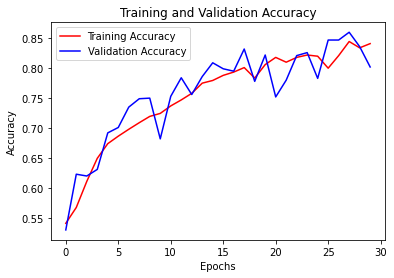

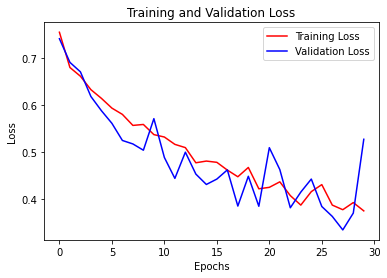

In [12]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, label = 'Training Accuracy', color = 'Red')
plt.plot(epochs, val_acc, label = 'Validation Accuracy', color = 'Blue')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, label = 'Training Loss', color = 'Red')
plt.plot(epochs, val_loss, label = 'Validation Loss', color = 'Blue')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()